In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/property.csv')

# Display the DataFrame
df.head()


,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,False,3.0,0.0,True,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,True,NaN,1.0,True,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,False,2.0,0.0,True,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,NaN,2.0,False,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,NaN,1.0,True,4.0


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
df.columns

Index(['item_id', 'deposit', 'monthly_rent', 'district_uuid', 'room_qty',
       'unit_area', 'has_elevator', 'building_floor_count', 'unit_floor',
       'has_storage_area', 'property_age'],
      dtype='object')

In [ ]:
# Split the data into features and target variable
X = df.drop(columns=['item_id', 'district_uuid'])
y = df['has_elevator']  # Target variable for classification

In [ ]:
# Convert boolean values to binary (0 and 1)
y = y.astype(int)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a classification model (Logistic Regression)
clf_model = LogisticRegression()
clf_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Train another classification model (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set for both models
y_pred_lr = clf_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [ ]:
# Calculate ROC curve and AUC for both models
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

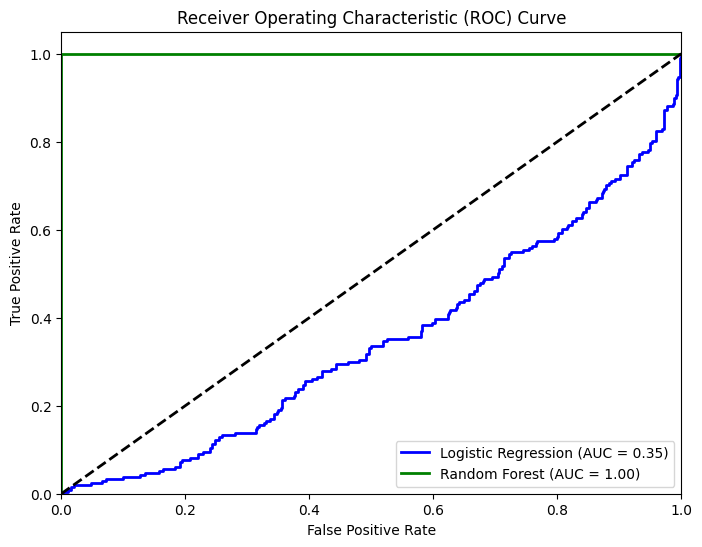

In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Calculate precision-recall curve for both models
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)

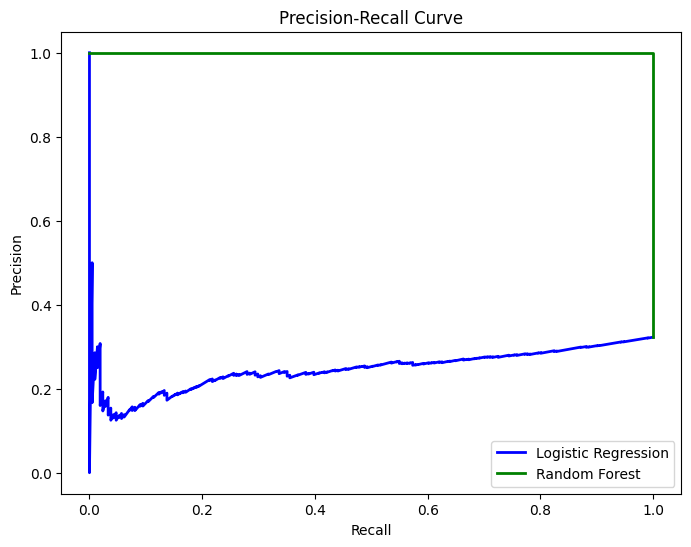

In [ ]:
# Plot precision-recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, color='green', lw=2, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.datasets import make_blobs
import numpy as np

In [ ]:
# Perform clustering (KMeans)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [ ]:
# Predict the cluster labels
cluster_labels = kmeans.predict(X_test)

In [ ]:
# Calculate clustering metrics
silhouette = silhouette_score(X_test, cluster_labels)
davies_bouldin = davies_bouldin_score(X_test, cluster_labels)

In [ ]:
print("\nClustering Metrics:")
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)


Clustering Metrics:
Silhouette Score: 0.6113180251779964
Davies-Bouldin Index: 0.5526345996002432
